# Scrubbing and Cleaning Data - Lab

## Introduction

In the previous labs, you joined the data from our separate files into a single DataFrame.  In this lab, you'll scrub the data to get it ready for exploration and modeling!

## Objectives

You will be able to:

* Perform the full data cleaning process for a dataset
* Identify and deal with null values appropriately
* Remove unnecessary columns


## Getting Started

You'll find the resulting dataset from your work in the _Obtaining Data_ Lab stored within the file `'Lego_data_merged.csv'`.  

In the cells below:

* Import `pandas` and set the standard alias. 
* Import `numpy` and set the standard alias. 
* Import `matplotlib.pyplot` and set the standard alias. 
* Import `seaborn` and set the alias `sns` (this is the standard alias for seaborn). 
* Use the ipython magic command to set all matplotlib visualizations to display inline in the notebook. 
* Load the dataset stored in the `'Lego_data_merged.csv'` file into a DataFrame, `df`. 
* Inspect the head of the DataFrame to ensure everything loaded correctly. 

In [1]:
# Import statements go here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('Lego_data_merged.csv')
display(df)

,prod_id,ages,piece_count,set_name,prod_desc,prod_long_desc,theme_name,country,list_price,num_reviews,play_star_rating,review_difficulty,star_rating,val_star_rating
0,75823,6-12,277,Bird Island Egg Heist,Catapult into action and take back the eggs fr...,Use the staircase catapult to launch Red into ...,Angry Birds™,US,$29.99,2.0,4.0,Average,4.5,4.0
1,75822,6-12,168,Piggy Plane Attack,Launch a flying attack and rescue the eggs fro...,Pilot Pig has taken off from Bird Island with ...,Angry Birds™,US,$19.99,2.0,4.0,Easy,5.0,4.0
2,75821,6-12,74,Piggy Car Escape,Chase the piggy with lightning-fast Chuck and ...,Pitch speedy bird Chuck against the Piggy Car....,Angry Birds™,US,$12.99,11.0,4.3,Easy,4.3,4.1
3,21030,12+,1032,United States Capitol Building,Explore the architecture of the United States ...,Discover the architectural secrets of the icon...,Architecture,US,$99.99,23.0,3.6,Average,4.6,4.3
4,21035,12+,744,Solomon R. Guggenheim Museum®,Recreate the Solomon R. Guggenheim Museum® wit...,Discover the architectural secrets of Frank Ll...,Architecture,US,$79.99,14.0,3.2,Challenging,4.6,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10865,70903,7-14,254,The Riddler™ Riddle Racer,Battle with Batman™ against The Riddler™ and h...,Take on four Super-Villains at once in THE LEG...,THE LEGO® BATMAN MOVIE,PT,$42.6878,18.0,4.2,Easy,4.2,4.4
10866,70910,7-14,204,Scarecrow™ Special Delivery,Help Batman™ to stop Scarecrow™ delivering a s...,Save Gotham City Energy Facility from a fear g...,THE LEGO® BATMAN MOVIE,PT,$30.4878,8.0,4.1,Average,4.4,4.1
10867,70901,7-14,201,Mr. Freeze™ Ice Attack,Protect the power plant from Mr. Freeze’s ice ...,Help Batman™ defend the Gotham City Energy Fac...,THE LEGO® BATMAN MOVIE,PT,$30.4878,19.0,4.1,Easy,4.6,4.4
10868,70913,6-12,141,Scarecrow™ Fearful Face-off,Power into the sky to stop Scarecrow’s fear ga...,Team up with Batman™ to stop Scarecrow™ spread...,THE LEGO® BATMAN MOVIE,PT,$18.2878,7.0,4.0,Easy,4.1,4.4


In [2]:
# Now, load in the dataset and inspect the head to make sure everything loaded correctly

## Starting our Data Cleaning

To start, you'll deal with the most obvious issue: data features with the wrong data encoding.

### Checking Data Types

In the cell below, use the appropriate method to check the data type of each column. 

In [3]:
# Your code her
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10870 entries, 0 to 10869
Data columns (total 14 columns):
prod_id              10870 non-null int64
ages                 10870 non-null object
piece_count          10870 non-null int64
set_name             10870 non-null object
prod_desc            10512 non-null object
prod_long_desc       10870 non-null object
theme_name           10870 non-null object
country              10870 non-null object
list_price           10870 non-null object
num_reviews          9449 non-null float64
play_star_rating     9321 non-null float64
review_difficulty    9104 non-null object
star_rating          9449 non-null float64
val_star_rating      9301 non-null float64
dtypes: float64(4), int64(2), object(8)
memory usage: 1.2+ MB


Now, investigate some of the unique values inside of the `list_price` column.

In [4]:
# Your code here
df.list_price.value_counts()


$24.3878              565
$36.5878              520
$12.1878              515
$18.2878              304
$42.6878              234
                     ... 
$869.9999999999999      1
$499.99                 1
$205.1924               1
$3.5429                 1
$987.9924               1
Name: list_price, Length: 733, dtype: int64

### Numerical Data Stored as Strings

A common issue to check for at this stage is numeric columns that have accidentally been encoded as strings. For example, you should notice that the `list_price` column above is currently formatted as a string and contains a proceeding '$'. Remove this and convert the remaining number to a `float` so that you can later model this value. After all, your primary task is to generate model to predict the price.

> Note: While the data spans a multitude of countries, assume for now that all prices have been standardized to USD.

In [5]:
# Your code here
df['list_price2'] = df['list_price'].str.slice_replace(0,1,'')
df['list_price2'] = pd.to_numeric(df['list_price2'])
print(df['list_price2'])

0        29.9900
1        19.9900
2        12.9900
3        99.9900
4        79.9900
          ...   
10865    42.6878
10866    30.4878
10867    30.4878
10868    18.2878
10869    18.2878
Name: list_price2, Length: 10870, dtype: float64


### Detecting and Dealing With Null Values

Next, it's time to check for null values. How to deal with the null values will be determined by the columns containing them, and how many null values exist in each.  
 
In the cell below, get a count of how many null values exist in each column in the DataFrame. 

In [6]:
# Your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10870 entries, 0 to 10869
Data columns (total 15 columns):
prod_id              10870 non-null int64
ages                 10870 non-null object
piece_count          10870 non-null int64
set_name             10870 non-null object
prod_desc            10512 non-null object
prod_long_desc       10870 non-null object
theme_name           10870 non-null object
country              10870 non-null object
list_price           10870 non-null object
num_reviews          9449 non-null float64
play_star_rating     9321 non-null float64
review_difficulty    9104 non-null object
star_rating          9449 non-null float64
val_star_rating      9301 non-null float64
list_price2          10870 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 1.2+ MB


Now, get some descriptive statistics for each of the columns. You want to see where the minimum and maximum values lie.  

In [7]:
# Your code here
df.describe()

,prod_id,piece_count,num_reviews,play_star_rating,star_rating,val_star_rating,list_price2
count,1.087000e+04,10870.000000,9449.000000,9321.000000,9449.000000,9301.000000,10870.000000
mean,6.181634e+04,503.936431,17.813737,4.355413,4.510319,4.214439,67.309137
std,1.736390e+05,831.209318,38.166693,0.617272,0.516463,0.670906,94.669414
min,6.300000e+02,1.000000,1.000000,1.000000,1.800000,1.000000,2.272400
25%,2.112300e+04,97.000000,2.000000,4.000000,4.300000,4.000000,21.899000
50%,4.207350e+04,223.000000,6.000000,4.500000,4.600000,4.300000,36.587800
75%,7.124800e+04,556.000000,14.000000,4.800000,5.000000,4.700000,73.187800
max,2.000431e+06,7541.000000,367.000000,5.000000,5.000000,5.000000,1104.870000


Now that you have a bit more of a understanding of each of these features you can make an informed decision about the best strategy for dealing with the various null values. 

Some common strategies for filling null values include:
* Using the mean of the feature
* Using the median of the feature
* Inserting a random value from a normal distribution with the mean and std of the feature
* Binning

Given that most of the features with null values concern user reviews of the lego set, it is reasonable to wonder whether there is strong correlation between these features in the first place. Before proceeding, take a minute to investigate this hypothesis.

In [8]:
corr = df.corr()

In [9]:
display(corr)

,prod_id,piece_count,num_reviews,play_star_rating,star_rating,val_star_rating,list_price2
prod_id,1.000000,0.221692,-0.044658,-0.008234,-0.062264,-0.083703,0.394525
piece_count,0.221692,1.000000,0.542208,-0.007952,0.067610,0.067296,0.865094
num_reviews,-0.044658,0.542208,1.000000,-0.060884,0.004541,0.026664,0.437724
play_star_rating,-0.008234,-0.007952,-0.060884,1.000000,0.619246,0.484341,-0.000685
star_rating,-0.062264,0.067610,0.004541,0.619246,1.000000,0.731538,-0.006497
val_star_rating,-0.083703,0.067296,0.026664,0.484341,0.731538,1.000000,-0.055899
list_price2,0.394525,0.865094,0.437724,-0.000685,-0.006497,-0.055899,1.000000


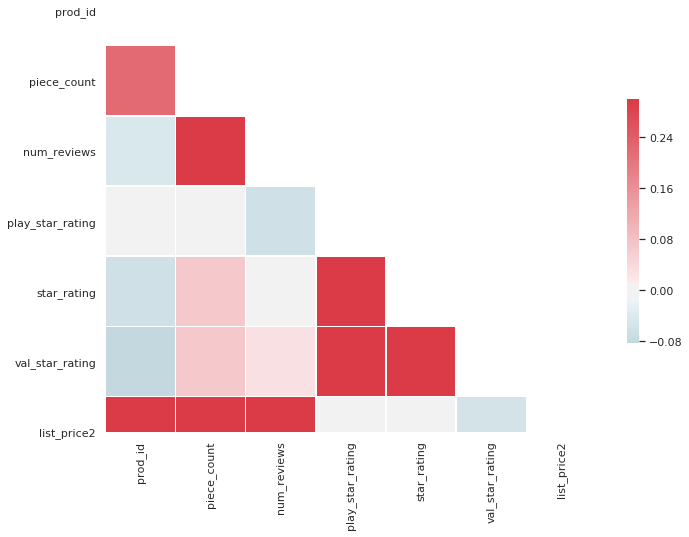

In [10]:
# Investigate whether multicollinearity exists between the review features 
# (num_reviews, play_star_rating, star_rating, val_star_rating]



from string import ascii_letters


sns.set(style="white")

# Generate a large random dataset

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Note that there is substantial correlation between the `play_star_rating`, `star_rating` and `val_star_rating`. While this could lead to multicollinearity in your eventual regression model, it is too early to clearly determine this at this point. Remember that multicollinearity is a relationship between 3 or more variables while correlation simply investigates the relationship between two variables.

Additionally, these relationships provide an alternative method for imputing missing values: since they appear to be correlated, you could use these features to help impute missing values in the others features. For example, if you are missing the `star_rating` for a particular row but have the `val_star_rating` for that same entry, it seems reasonable to assume that it is a good estimate for the missing `star_rating` value as they are highly correlated. That said, doing so does come with risks; indeed you would be further increasing the correlation between these features which could further provoke multicollinearity in the final model.

Investigate if you could use one of the other star rating features when one is missing. How many rows have one of `play_star_rating`, `star_rating` and `val_star_rating` missing, but not all three.

In [46]:
index = set(df.index.to_list())
all_present = index - set(df[['play_star_rating', 'star_rating','val_star_rating']].dropna(thresh=3).index.to_list())
all_missing = index - set(df[['play_star_rating', 'star_rating','val_star_rating']].dropna(how='all').index.to_list()) 
one_present = list(all_present - all_missing)

one_df = df[df.index.isin(one_present)][['play_star_rating', 'star_rating','val_star_rating']]
#df_ratings_all = df[['play_star_rating', 'star_rating','val_star_rating']].isna()
display(one_df.isna().sum())

play_star_rating    128
star_rating           0
val_star_rating     148
dtype: int64

Well, it seems like when one is missing, the other two are also apt to be missing. While this has been a bit of an extended investigation, simply go ahead and fill the missing values with that feature's median. Fill in the missing values of `review_difficulty` feature  with string `'unknown'`.

In [52]:
# Your code here
cols = ['play_star_rating', 'star_rating','val_star_rating']
for col in cols:
    df[col].fillna(value=df[col].median(),inplace=True)

df['review_difficulty'].fillna(value='unknown',inplace=True)    

display(df.isna().any())

prod_id              False
ages                 False
piece_count          False
set_name             False
prod_desc             True
prod_long_desc       False
theme_name           False
country              False
list_price           False
num_reviews           True
play_star_rating     False
review_difficulty    False
star_rating          False
val_star_rating      False
list_price2          False
dtype: bool

## Normalizing the Data

Now, you'll need to convert all of our numeric columns to the same scale by **_normalizing_** our dataset.  Recall that you normalize a dataset by converting each numeric value to it's corresponding z-score for the column, which is obtained by subtracting the column's mean and then dividing by the column's standard deviation for every value. 


In the cell below:

* Normalize the numeric X features by subtracting the column mean and dividing by the column standard deviation. 
(Don't bother to normalize the `list_price` as this is the feature you will be predicting.)

In [54]:
# Your code here

numerics = ['star_rating','piece_count','num_reviews']

for col in numerics:
    df[col] = (df[col] - df[col].mean())/df[col].std()

## Saving Your Results

While you'll once again practice one-hot encoding as you would to preprocess data before fitting a model, saving such a reperesentation of the data will eat up additional disk space. After all, a categorical variable with 10 bins will be transformed to 10 seperate features when passed through `pd.get_dummies()`. As such, while further practice is worthwhile, save your DataFrame as-is for now.

In [56]:
# Your code here
df.to_csv('df_cleaned')

## One-Hot Encoding Categorical Columns

As a final step, you'll need to deal with the categorical columns by **_one-hot encoding_** them into binary variables via the `pd.get_dummies()` function.  

When doing this, you may also need to subset the appropriate features to avoid encoding the wrong data. The `get_dummies()` function by default converts all columns with *object* or *category* dtype. However, you should always check the result of calling `get_dummies()` to ensure that only the categorical variables have been transformed. Consult the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) for more details. If you are ever unsure of the data types, call the `.info()` method.

In the cell below, subset to the appropriate predictive features and then use `pd.get_dummies()` to one-hot encode the dataset properly.

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10870 entries, 0 to 10869
Data columns (total 15 columns):
prod_id              10870 non-null int64
ages                 10870 non-null object
piece_count          10870 non-null float64
set_name             10870 non-null object
prod_desc            10512 non-null object
prod_long_desc       10870 non-null object
theme_name           10870 non-null object
country              10870 non-null object
list_price           10870 non-null object
num_reviews          9449 non-null float64
play_star_rating     10870 non-null float64
review_difficulty    10870 non-null object
star_rating          10870 non-null float64
val_star_rating      10870 non-null float64
list_price2          10870 non-null float64
dtypes: float64(6), int64(1), object(8)
memory usage: 1.2+ MB


In [62]:
# Your code here

df_subset = df[['star_rating','piece_count','num_reviews','prod_id','ages','theme_name','country']]
df_one_hot = pd.get_dummies(df_subset)
display(df_one_hot)

,star_rating,piece_count,num_reviews,prod_id,ages_10+,ages_10-14,ages_10-16,ages_10-21,ages_11-16,ages_12+,...,country_GB,country_IE,country_IT,country_LU,country_NL,country_NO,country_NZ,country_PL,country_PT,country_US
0,-0.045687,-0.273020,-0.414333,75823,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.990651,-0.404154,-0.414333,75822,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.460222,-0.517242,-0.178526,75821,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.161581,0.635296,0.135885,21030,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0.161581,0.288812,-0.099923,21035,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10865,-0.667489,-0.300690,0.004880,70903,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10866,-0.252954,-0.360843,-0.257128,70910,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10867,0.161581,-0.364453,0.031081,70901,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10868,-0.874757,-0.436637,-0.283329,70913,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


That's it! You've now successfully scrubbed your dataset -- you're now ready for data exploration and modeling!

## Summary

In this lesson, you gained practice with scrubbing and cleaning data. Specifically, you addressed an incorrect data type, detected and dealt with null values, checked for multicollinearity, and transformed data. Congrats on performing the full data cleaning process for a dataset!